In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv(r"C:\Users\Faiq Hilman\Downloads\censusCrimeClean(2).csv")
d

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [29]:
independent=d["medIncome"];
dependent = d["ViolentCrimesPerPop"]

In [34]:
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np
    
kf = KFold(n_splits=5)
foldCount = 0
for train_idxs, test_idxs in kf.split(d):
    print("Run: ", foldCount)
    print(len(d),len(train_idxs),len(test_idxs))
    #put your code here
    foldCount += 1 

Run:  0
1994 1595 399
Run:  1
1994 1595 399
Run:  2
1994 1595 399
Run:  3
1994 1595 399
Run:  4
1994 1596 398


In [35]:
dependentSubset = dependent[train_idxs]
independentSubset = independent[train_idxs]
dependentSubsetUnseen = dependent[test_idxs]
independentSubsetUnseen = independent[test_idxs]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = dependentSubset
y = independentSubset
x = np.array(x)
y = np.array(y)

In [40]:
x.reshape(2, -2)


array([[0.2 , 0.67, 0.43, ..., 0.25, 0.02, 0.08],
       [0.05, 0.05, 0.02, ..., 0.02, 0.24, 0.87]])

In [41]:
y.reshape(2,-2)

array([[0.37, 0.31, 0.3 , ..., 0.31, 0.35, 0.16],
       [0.15, 0.6 , 0.59, ..., 0.5 , 0.29, 0.19]])

In [45]:
model = LinearRegression()
model.fit(x,y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
r_sq=model.score(x,y)
print("R2=",r_sq)

ValueError: Expected 2D array, got 1D array instead:
array=[0.2  0.67 0.43 ... 0.02 0.24 0.87].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

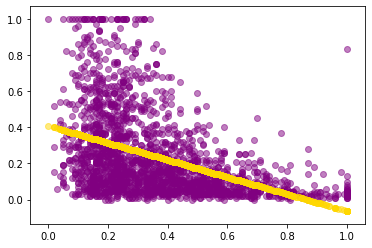

In [15]:
d['pred'] = model.predict(d[['medIncome']])

plt.scatter(d['medIncome'],d['ViolentCrimesPerPop'],c="purple", alpha=0.5)
plt.scatter(d['medIncome'], d['pred'],c="gold", alpha = 0.5)

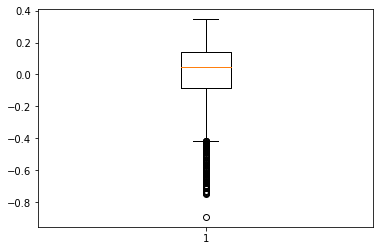

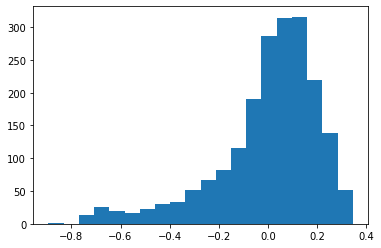

Mean 0.000000000000
Standard devation 0.210981544504
Mean price 0.237978936810
Median price 0.150000000000


In [16]:
d['resid'] = d['pred']-d['ViolentCrimesPerPop']
plt.boxplot(d['resid'])
plt.show()
plt.hist(d['resid'],bins=20)
plt.show()
d['resid'].describe()
print("Mean {:.12f}".format(d['resid'].mean()))#More readable number
print("Standard devation {:.12f}".format(d['resid'].std()))#More readable number
print("Mean price {:.12f}".format(d['ViolentCrimesPerPop'].mean()))
print("Median price {:.12f}".format(d['ViolentCrimesPerPop'].median()))